In [644]:
import csv
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt

a=list()
b=list()
bb=list()
c=list()
with open('btc1st.csv', encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = ",")
    count = 0
    for row in file_reader:
        if count != 0 and count <=1182:
            x=float(row[2])
            a.append(x)
        count += 1
print(len(a))



1182


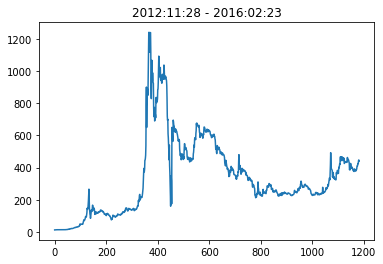

In [645]:
plt.plot(a)
plt.title('2012:11:28 - 2016:02:23')
plt.show()


In [646]:
with open('btc2nd.csv', encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = ",")
    count = 0
    for row in file_reader:
        if count>140 and count <=1322:
            x=float(row[2])
            b.append(x)
        if count!=0 and count<=439:
            x=float(row[2])
            bb.append(x)
        count += 1

print(len(b))
print(len(bb))


1182
439


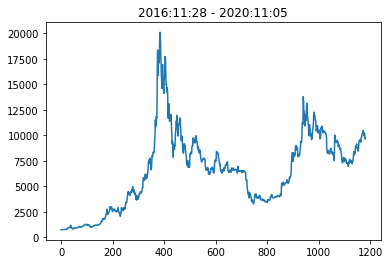

In [647]:
plt.plot(b)
plt.title('2016:11:28 - 2020:11:05')
plt.show()

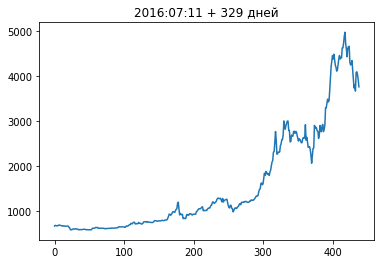

In [648]:
plt.plot(bb)
plt.title('2016:07:11 + 329 дней')
plt.show()

In [649]:
with open('btc4rd.csv', encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = ",")
    count = 0
    for row in file_reader:
        if count != 0 and row[2]!="null":
            x=float(row[2])
            c.append(x)
        count += 1
    print(len(c))

439


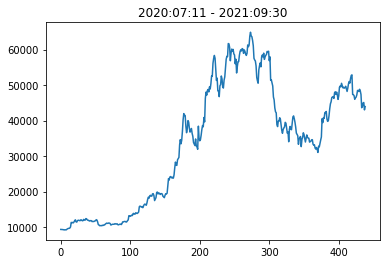

In [650]:
plt.plot(c)
plt.title('2020:07:11 - 2021:09:30')
plt.show()

In [651]:
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)
pearson_def(a, b)



0.7192444980334539

In [652]:
pearson_def(bb, c)


0.49027881129462775

In [653]:
def kl(a,b):
    pa =list()
    for i in range(0,len(a)):
        q=a[i]/sum(a)
        pa.append(q)
    Shannon1 = -np.sum(pa*np.log2(pa))
    print(Shannon1)
    pb =list()
    for i in range(0,len(b)):
        q=b[i]/sum(b)
        pb.append(q)
    Shannon2 = -np.sum(pb*np.log2(pb))
    print(Shannon2)
    return(Shannon1-Shannon2)
kl(b,a)

9.951596262837509
9.850013386880555


0.1015828759569537

In [654]:
kl(c,bb)

8.570900984770606
8.43301469804441


0.13788628672619652

In [655]:
pb =list()
for i in range(0,len(bb)):
    q=bb[i]/sum(bb)
    pb.append(q)
pa =list()
for i in range(0,len(c)):
    q=c[i]/sum(c)
    pa.append(q)

def kll(p, q):
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))
print(kll(pb,pa))

0.15569121356745594


C:\Users\drags\AppData\Local\Temp/ipykernel_23620/2750147340.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.asarray(p, dtype=np.float)
C:\Users\drags\AppData\Local\Temp/ipykernel_23620/2750147340.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  q = np.asarray(q, dtype=np.float)
